## 1. Cubic Spline

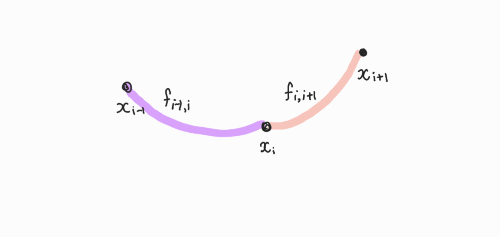

In [2]:
import numpy as np

def LUdecomp3(c, d, e) : 
    n = len(d)
    
    for i in range(1, n) : 
        portion = c[i - 1] / d[i - 1]
        d[i] = d[i] - portion * e[ i -1]
        c[i - 1] = portion

    return c, d, e

def LUsolve3(c, d, e, b) : 
    n = len(d)

    for i in range(1, n) : 
        
        
        
        
        pass
    
    
    
    pass

# 차피 결국 LU 분해. 그냥 주대각성분 d 이고 np.eye(n, k=1) 이 e, np.eye(n, k=-1) 이 c 인 행렬일 뿐임

### 1. $f''_{i,i+1}(x_i) = f''_{i,i+1}(x_i) = k_i$ <br>

$f''_{i,i+1}$ 가 $(x_i,k_i),(x_{i+1},k_{i+1})$을 지난다고 하면 Lagrange에 의해 $$f''_{i,i+1}(x) =k_i l_i(x) +k_{i+1}l_{i+1}(x)$$

여기서
$~~l_i(x) = \frac{x-x_{i+1}}{x_i-x_{i+1}} , ~~~~~ l_{i+1}(x) = \frac{x-x_{i}}{x_{i+1}-x_{i}}$ 이므로 

$f''_{i,i+1}(x) = \frac{k_i (x-x_{i+1}) - k_{i+1}(x-x_i)}{x_i - x_{i+1}}$ 이고 $f''_{i-1,i}(x_i) = f''_{i,i+1}(x_i) = k_i$ 이므로 $f''_{i-1,i}(x)$ 도 구할수 있다.

$f''_{i,i+1}$를 두번 적분하면 $$f_{i,i+1}(x)=\frac{k_i(x_i - x_{i+1})^3 - k_{i+1}(x_i - x_{i+1})}{6(x_i - x_{i+1})} +A(x-x_{i+1}) -B(x-x_i)$$ 이다.


### 2. $f_{i,i+1}(x_i)=y_i , f_{i,i+1}(x_{i+1})=y_{i+1}$  <BR>
    
해당조건을 만족하면 $A,B$를 구할수 있다.

$A=\frac{y_i}{x_i - x_{i+1}} - \frac{k_i}{6}(x_i-x_{i+1}) ,~~~~~ B=\frac{y_{I+1}}{x_i - x_{i+1}} - \frac{k_{i+1}}{6}(x_i-x_{i+1})$ 를 $f_{i,i+1}(x)$ 에 대입하면

$$f_{i,i+1}(x) = \frac{k_i}{6}[\frac{(x-x_{i+1})^3}{x_i-x_{i+1}} - (x-x_{i+1})(x_i-x_{i+1})] \\-  \frac{k_{i+1}}{6}[\frac{(x-x_{i})^3}{x_i-x_{i+1}} - (x-x_{i})(x_i-x_{i+1})] \\+ \frac{y_i(x-x_{i+1}) - y_{i+1}(x-x_i)}{x_i-x_{i+1}}$$

### 3. $f'_{i-1.i}(x_i) = f'_{i,i+1}(x_i)$

2번에서 구한 $f'_{i,i+1}$을 미분해서 위의 조건을 만족하는 식을 정리하면

$$k_{i-1}(x_{i-1}-x_i) + 2k_i(x_{i-1}-x_{i+1}) + k_{i+1}(x_i - x_{i+1}) = 6(\frac{y_{i-1}-y_i}{x_{i-1}-x_i} - \frac{y_i - y_{i+1}}{x_i-x_{i+1}}) ~~~~~ i =1,2,...,n-1$$

가 되므로 triagonal coeffecient matrix로 만들수 있다.<br>

In [20]:
import numpy as np
from numpy import ndarray
def Cubic_spline_matrix(x_data : ndarray, y_data : ndarray) : 
    
    if x_data.ndim != 1 : 
        x_data = x_data.astype(dtype=float).flatten()
    if y_data.ndim != 1 : 
        y_data = y_data.astype(dtype=float).flatten()
    
    n = len(x_data)

    A = np.zeros((n,n))
    B = np.zeros((n,1))
    
    # K = np.zeros((n,1))
    for i in range(1, n - 1) : 
        A[i, i - 1] = x_data[i - 1] - x_data[i]
        A[i,i] = 2 * (x_data[i - 1] - x_data[i + 1])
        A[i, i + 1] = x_data[i] - x_data[i + 1]
        B[i] = 6 * (((y_data[i - 1] - y_data[i]) / (x_data[i - 1] - x_data[i])) - ((y_data[i] - y_data[i + 1]) / (x_data[i] - x_data[i + 1])))
    
    return A, B

def Cubic_spline_k_solve(x_data : ndarray, y_data : ndarray) : 
    A, B = Cubic_spline_matrix(x_data=x_data, y_data=y_data)
    
    K = np.zeros(B.shape, dtype=float)
    n = len(A)

    A = A[1:n-1, 1:n-1]
    B = B[1:n-1]

    K[0] = 0
    K[n - 1] = 0

    k_solve = np.linalg.solve(A, B)

    for i in range(1, n-1) : 
        K[i] = k_solve[i - 1]
    
    return K

# f(x) = ax^3 + bx^2 + cx + d
def Cubic_spline_solve(x_data : ndarray, y_data : ndarray, num=100) : 
    K = Cubic_spline_k_solve(x_data=x_data, y_data=y_data)
    n = len(x_data)

    y_spline = np.zeros((n-1, num))
    for i in range(0, n - 1) : 
        x_i = x_data[i]
        x_i1 = x_data[i + 1]
        x_i_i1 = x_i - x_i1
        x_spline = np.linspace(x_data[i], x_data[i + 1], num).reshape(num)
        
        y_spline[i] = K[i] / 6 * (((x_spline - x_i1)**3) / x_i_i1 - (x_spline - x_i1) * x_i_i1)
        y_spline[i] -= K[i + 1] / 6 * (((x_spline - x_i)**3) / x_i_i1 - (x_spline - x_i) * x_i_i1)
        y_spline[i] += (y_data[i] * (x_spline - x_i1) - y_data[i + 1] * (x_spline - x_i)) / x_i_i1
        # print(x_spline[int(num / 2)])

        # print(y_spline[i][int(num/2)])
        # print()

    y_spline = y_spline.flatten()
    x_spline = np.linspace(min(x_data), max(x_data), len(y_spline))

    return x_spline, y_spline

In [21]:
x_data = np.array([1, 2, 3, 4, 5], dtype=float)
y_data = np.array([0, 1, 0, 1, 0])


A, B = Cubic_spline_matrix(x_data=x_data, y_data=y_data)
print(A, B, sep="\n")
K = Cubic_spline_k_solve(x_data=x_data, y_data=y_data)
print(K)
# print(-30 / 7, 36 / 7)

[[ 0.  0.  0.  0.  0.]
 [-1. -4. -1.  0.  0.]
 [ 0. -1. -4. -1.  0.]
 [ 0.  0. -1. -4. -1.]
 [ 0.  0.  0.  0.  0.]]
[[  0.]
 [ 12.]
 [-12.]
 [ 12.]
 [  0.]]
[[ 0.        ]
 [-4.28571429]
 [ 5.14285714]
 [-4.28571429]
 [ 0.        ]]


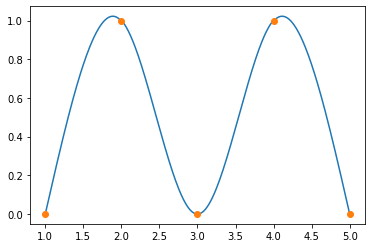

In [92]:
# A, B = Cubic_spline_matrix(x_data=x_data, y_data=y_data)
# print(A, B, sep="\n")
x_spline, y_spline = Cubic_spline_solve(x_data=x_data, y_data=y_data)

import matplotlib.pyplot as plt 

plt.plot(x_spline, y_spline)
plt.plot(x_data, y_data, 'o')
plt.show()

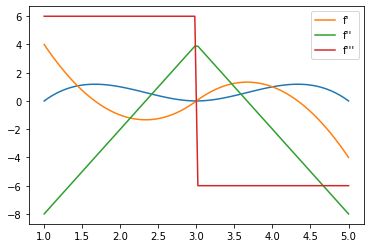

In [43]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(x_data, y_data)

x_plot = np.linspace(1, 5, 100)
plt.plot(x_plot, cs(x_plot))
plt.plot((x_plot), cs(x_plot, 1), label="f'")
plt.plot((x_plot), cs(x_plot, 2), label="f''")
plt.plot((x_plot), cs(x_plot, 3), label="f'''")
# plt.plot(x_data, y_data, 'o')
plt.legend()
plt.show()

## Example1

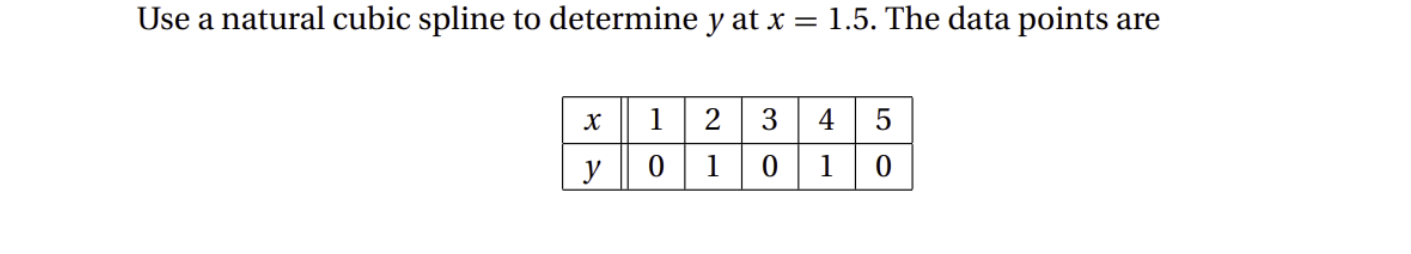

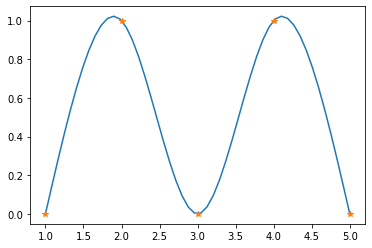

## 2. Newton's Method

**$$f(x)=a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \dots + a_n(x-x_0)(x-x_1)\dots(x-x_n)$$**

$$f(x_0)=a_0=y_0$$

$$f(x_1)=a_0+a_1(x-x_0) = y_1 ~~~\rightarrow~~~ a_1=\frac{y_1-y_0}{x_1-x_0} ~~ = f[x_1,x_0]$$

$$f(x_2)=a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)=y_2~~~\rightarrow~~~ a_2 = \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1-x_0}{x_1-x_0}}{x_2-x_0} ~~ = f[x_2,x_1,x_0]$$

**$$f[x_k,...,x_0] = \frac{f[x_k,...,x_1]-f[x_{k-1},...,x_0]}{x_k-x_0}$$**

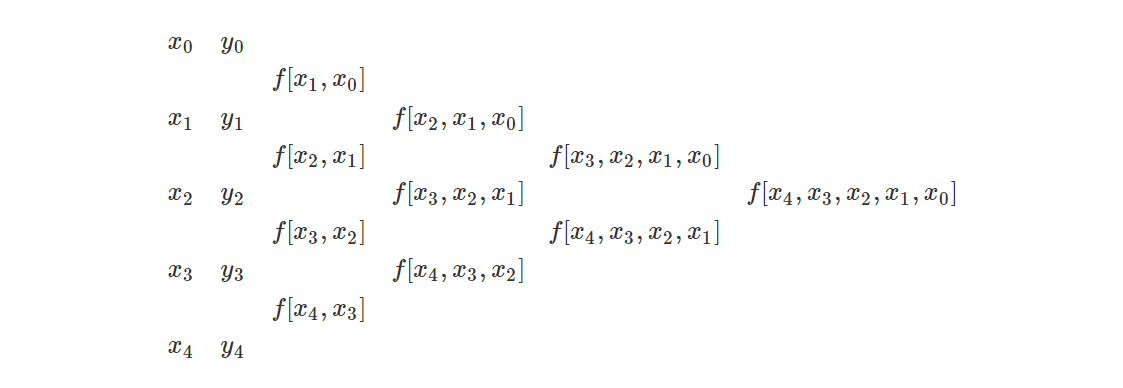

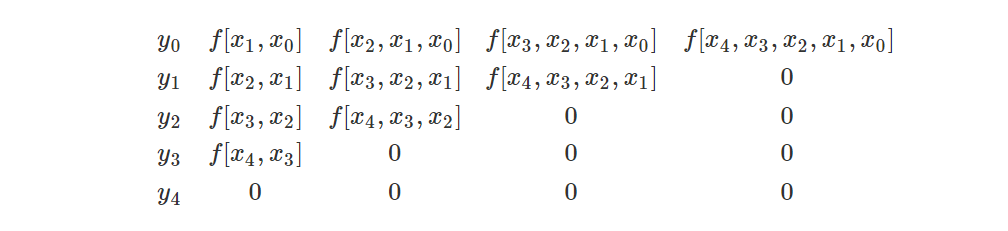

## Example2


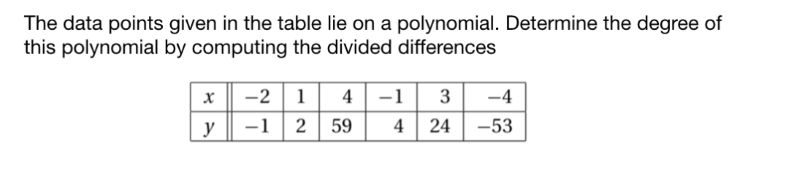

In [11]:
from numpy import ndarray

def Newton_polyeval(x_data : ndarray) : 
    
    n = len(x_data)
    Eval_matrix = np.zeros((n, n), dtype=float)
    Eval_matrix[:,0] = 1

    for column in range(1, n) : 
        for row in range(column, n) : 
            Eval_matrix[row, column] = Eval_matrix[row, column - 1] * (x_data[row] - x_data[column - 1])
    
    return Eval_matrix

def Newton_coefficient_matrix(x_data : ndarray, y_data : ndarray) : 
    if x_data.ndim != 1 : 
        x_data = x_data.astype(float).flatten()
    if y_data.ndim != 1 : 
        y_data = y_data.astype(float).flatten()
    
    Poly_degree = len(x_data) - 1
    A = Newton_polyeval(x_data=x_data)
    B = np.array([y_data]).T

    Coef_matrix = np.linalg.solve(A, B)

    return Coef_matrix

def Newton_solve(x_data : ndarray, y_data : ndarray, num=100) : 
    
    Coef_matrix = Newton_coefficient_matrix(x_data=x_data, y_data=y_data)
    x_newton = np.linspace(min(x_data), max(x_data), num, dtype=float)

    n = len(Coef_matrix)
    
    y_newton = Coef_matrix[n - 1]
    for i in range(1, n + 1) : 
        y_newton = Coef_matrix[n - i] + (x_newton - x_data[n - i]) * y_newton
    
    return y_newton



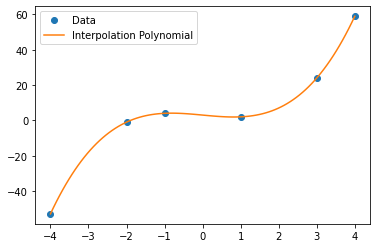

[[-1.  1.  3.  1. -0. -0.]]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([-2, 1, 4, -1, 3, -4], dtype=float)
y_data = np.array([-1, 2, 59, 4, 24, -53], dtype=float)

# print(Newton_polyeval(x_data=x_data))
# Newton_coefficient_matrix(x_data=x_data, y_data=y_data)
y_newton = Newton_solve(x_data=x_data, y_data=y_data)
x_newton = np.linspace(min(x_data), max(x_data), len(y_newton))

plt.plot(x_data, y_data, 'o', label="Data")
plt.plot(x_newton, y_newton, label="Interpolation Polynomial")
plt.legend()
plt.show()
print(np.round(Newton_coefficient_matrix(x_data=x_data, y_data=y_data), 2).T)

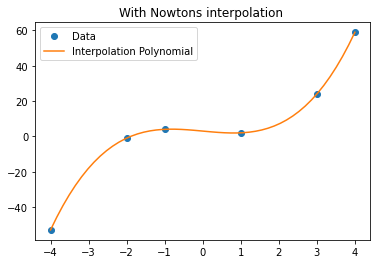

The coefficients of the Nowtons Ploynomial : [-1.  1.  3.  1.  0.  0.]
